## Python Library and Package Installation

In [58]:
# Library pengolahan data
import pandas as pd
import numpy as np
import sqlite3
from datetime import date, timedelta
import math

# Library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

### SQL Data Connection and Convert to Dataframe

In [59]:
# Connect database
con = sqlite3.connect("olist.db")
#cur = conn.cursor()

# Execute connecti on and get all table's names
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, con)
print(tables)

                                name
0            olist_customers_dataset
1          olist_geolocation_dataset
2               olist_orders_dataset
3          olist_order_items_dataset
4       olist_order_payments_dataset
5        olist_order_reviews_dataset
6             olist_products_dataset
7              olist_sellers_dataset
8  product_category_name_translation


In [60]:
# Convert to pandas dataframes
df_products = pd.read_sql("SELECT * FROM olist_products_dataset", con)
df_order_customer = pd.read_sql("SELECT * FROM olist_customers_dataset", con)
df_order = pd.read_sql("SELECT * FROM olist_orders_dataset", con)
df_order_reviews = pd.read_sql("SELECT * FROM olist_order_reviews_dataset", con)
df_order_payments = pd.read_sql("SELECT * FROM olist_order_payments_dataset", con)
df_order_items = pd.read_sql("SELECT * FROM olist_order_items_dataset", con)
df_sellers = pd.read_sql("SELECT * FROM olist_sellers_dataset", con)
df_geolocation = pd.read_sql("SELECT * FROM olist_geolocation_dataset", con)
df_translations = pd.read_sql("SELECT * FROM product_category_name_translation", con)

### Data Merge

In [61]:
# Rename the column in df_translations
df_translations = df_translations.rename(columns={'﻿product_category_name': 'product_category_name'})

In [62]:
# Merge necessary dataframes
data_merged = df_products.merge(df_translations, on='product_category_name', how='inner')
data_merged = data_merged.merge(df_order_items, on='product_id', how='outer')
data_merged = data_merged.merge(df_order, on='order_id', how='outer')
data_merged = data_merged.merge(df_order_customer, on='customer_id', how='outer')
data_merged = data_merged.merge(df_sellers, on='seller_id', how='outer')
data_merged = data_merged.merge(df_order_payments, on='order_id', how='outer')
data_merged = data_merged.merge(df_order_reviews, on='order_id', how='outer')

In [63]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   product_id                     118310 non-null  object
 1   product_category_name          116576 non-null  object
 2   product_name_lenght            116576 non-null  object
 3   product_description_lenght     116576 non-null  object
 4   product_photos_qty             116576 non-null  object
 5   product_weight_g               116576 non-null  object
 6   product_length_cm              116576 non-null  object
 7   product_height_cm              116576 non-null  object
 8   product_width_cm               116576 non-null  object
 9   product_category_name_english  116576 non-null  object
 10  order_id                       119143 non-null  object
 11  order_item_id                  118310 non-null  object
 12  seller_id                      118310 non-nu

Diketahui penulisan kolom
'product_category_name' mengandung Hidden Special Character, sehingga untuk melakukan join ke data terkait (df_translation) harus di rename untuk menghilangkan karakter tersebut.




### Data Cleaning

##### Delete Unnecessary Columns

In [64]:
# Delete unnecessary columns
data_filtered = data_merged.drop(columns=['product_photos_qty', 'product_name_lenght', 'product_description_lenght',
                                          'product_length_cm', 'product_width_cm', 'product_height_cm',
                                          'customer_zip_code_prefix', 'review_answer_timestamp',
                                          'review_creation_date'])

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   product_id                     118310 non-null  object
 1   product_category_name          116576 non-null  object
 2   product_weight_g               116576 non-null  object
 3   product_category_name_english  116576 non-null  object
 4   order_id                       119143 non-null  object
 5   order_item_id                  118310 non-null  object
 6   seller_id                      118310 non-null  object
 7   shipping_limit_date            118310 non-null  object
 8   price                          118310 non-null  object
 9   freight_value                  118310 non-null  object
 10  customer_id                    119143 non-null  object
 11  order_status                   119143 non-null  object
 12  order_purchase_timestamp       119143 non-nu

##### Change Dtypes

In [65]:
# Mengganti empty string di 'product_wight_g' dengan NaN
data_filtered['product_weight_g'] = pd.to_numeric(data_filtered['product_weight_g'], errors='coerce')

# Mengubah tipe data kolom tertentu
data_filtered = data_filtered.astype({

    'order_purchase_timestamp': 'datetime64[ns]',
    'order_approved_at': 'datetime64[ns]',
    'order_delivered_carrier_date': 'datetime64[ns]',
    'order_delivered_customer_date': 'datetime64[ns]',
    'order_estimated_delivery_date': 'datetime64[ns]',
    'payment_sequential': 'float64',
    'payment_installments': 'float64',
    'payment_value': 'float64',
    'review_score': 'float64',
    'price': 'float64',
    'order_item_id': 'float64',
    'shipping_limit_date': 'datetime64[ns]',
    'freight_value': 'float64',
    'product_weight_g': 'float64',
})

# Menampilkan info data_filtered untuk melihat perubahan tipe data
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     118310 non-null  object        
 1   product_category_name          116576 non-null  object        
 2   product_weight_g               116575 non-null  float64       
 3   product_category_name_english  116576 non-null  object        
 4   order_id                       119143 non-null  object        
 5   order_item_id                  118310 non-null  float64       
 6   seller_id                      118310 non-null  object        
 7   shipping_limit_date            118310 non-null  datetime64[ns]
 8   price                          118310 non-null  float64       
 9   freight_value                  118310 non-null  float64       
 10  customer_id                    119143 non-null  object        
 11  



1. Menghapus kolom pada 'data_merged' yg tidak diperlukan dalam tahap analisis.
  *   Ada 12 kolom yang dihapus dan menyisahkan 28 kolom yang akan digunakan.
  *   Menyimpan data tersisa ke 'data_filtered' untuk malukan tahap pengecekan missing values dan data duplicate.

2. Semua tipe data pada kolom adalah object, sehingga harus dilakukan penyesuaian tipe data sesuai dengan karakteristik masing-masing kolom. Khusus untuk 'product_weight_g' karena datanya terdapat empty string (' '), maka perlu di konversi  agar tipe datanya bisa di ubah ke tipe data numerik (float64).

##### Handling Missing Values

Setelah dilakukan merge dataset, maka akan dilakukan data preparation, yaitu mengindentifikasi missing values secara total dan persentase.

In [66]:
# Mendapatkan jumlah missing value tiap kolom
nan_col = data_filtered.isna().sum().sort_values(ascending=False)
nan_col

# Mendapatkan persentase missing value tiap kolom
n_data = len(data_filtered)

percent_nan_col = (nan_col / n_data) * 100
percent_nan_col

# Show count dan persen NaN
df_nan_col = pd.DataFrame({'count_nan': nan_col, 'persen_nan': percent_nan_col})
df_nan_col

,count_nan,persen_nan
order_delivered_customer_date,3421,2.871339
product_weight_g,2568,2.155393
product_category_name_english,2567,2.154554
product_category_name,2567,2.154554
order_delivered_carrier_date,2086,1.750837
review_comment_title,997,0.836810
review_score,997,0.836810
review_id,997,0.836810
review_comment_message,997,0.836810
freight_value,833,0.699160


In [67]:
# Drop missing values
data_clean = data_filtered.dropna()

# Check % apakah masih ada missing values
check_nan_col = data_clean.isna().sum() / len(data_clean) * 100
check_nan_col

,0
product_id,0.0
product_category_name,0.0
product_weight_g,0.0
product_category_name_english,0.0
order_id,0.0
order_item_id,0.0
seller_id,0.0
shipping_limit_date,0.0
price,0.0
freight_value,0.0


In [68]:
# Check duplicates
data_clean[data_clean.duplicated()]

,product_id,product_category_name,product_weight_g,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,...,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message


1. Dari pengecekan missing values, kolom 'order_delivered_customer_date' merupakan kolom dengan jumlah NaN tertinggi yaitu 3.421 baris data atau sekitar 2,87% dari total keseluruhan data (119.143 baris).

2. Karena jumlah missing values pada kolom tidak terbilang besar (tidak sampai 10%), maka baiknya kita drop saja lalu disimpan kedalam 'data_clean'.

3. Setelah menghapus semua data NaN, selanjutnya melakukan pengecekan kembali apakah masih ada missing values atau tidak.

##### Add Column

In [69]:
# Add time column based on order_approved dates
data_clean['date'] = pd.to_datetime(data_clean['order_purchase_timestamp'])
data_clean['day'] = data_clean['date'].dt.day
data_clean['month'] = data_clean['date'].dt.month
data_clean['year'] = data_clean['date'].dt.year
data_clean['hour'] = data_clean['date'].dt.hour
data_clean['year_month'] = data_clean['date'].dt.to_period("M")

# Check new time columns
data_clean[['date','year','month','day','hour','year_month']].head(3)

# convert period data in year_month back to timestamp data
#data_clean.year_month = data_clean.year_month.dt.to_timestamp()

,date,year,month,day,hour,year_month
0,2017-09-13 08:59:02,2017,9,13,8,2017-09
1,2017-04-26 10:53:06,2017,4,26,10,2017-04
2,2018-01-14 14:33:31,2018,1,14,14,2018-01


In [70]:
data_clean['total_order_value'] = data_clean['price'] + data_clean['freight_value']

# show result
data_clean[['order_id', 'year_month', 'price', 'freight_value', 'total_order_value']].sample(3)

,order_id,year_month,price,freight_value,total_order_value
61919,84f9f9d8251eed3b45a627d105aabe44,2018-07,12.90,7.39,20.29
44690,5fdc93e450ccb779c5d594b36f99bc04,2018-07,59.99,19.61,79.60
32452,4575195c5ca6f5a5e4b623b45e865a6e,2018-01,38.48,15.10,53.58


In [71]:
data_clean.describe(include='number', exclude=[np.datetime64, 'datetime64[ns]'])

,product_weight_g,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,day,month,year,hour,total_order_value
count,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000
mean,2106.236075,1.195065,119.846650,20.002595,1.090818,2.943680,171.557922,4.082505,15.556041,6.037432,2017.541906,14.764614,139.849246
std,3765.207714,0.687526,181.079901,15.711728,0.686674,2.779181,264.197701,1.345924,8.665043,3.221918,0.504148,5.324879,188.111745
min,0.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2016.000000,0.000000,6.080000
25%,300.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,8.000000,3.000000,2017.000000,11.000000,55.260000
50%,700.000000,1.000000,74.900000,16.320000,1.000000,2.000000,107.960000,5.000000,16.000000,6.000000,2018.000000,15.000000,91.780000
75%,1800.000000,1.000000,132.980000,21.190000,1.000000,4.000000,189.150000,5.000000,23.000000,8.000000,2018.000000,19.000000,157.300000
max,40425.000000,21.000000,6735.000000,409.680000,26.000000,24.000000,13664.080000,5.000000,31.000000,12.000000,2018.000000,23.000000,6929.310000


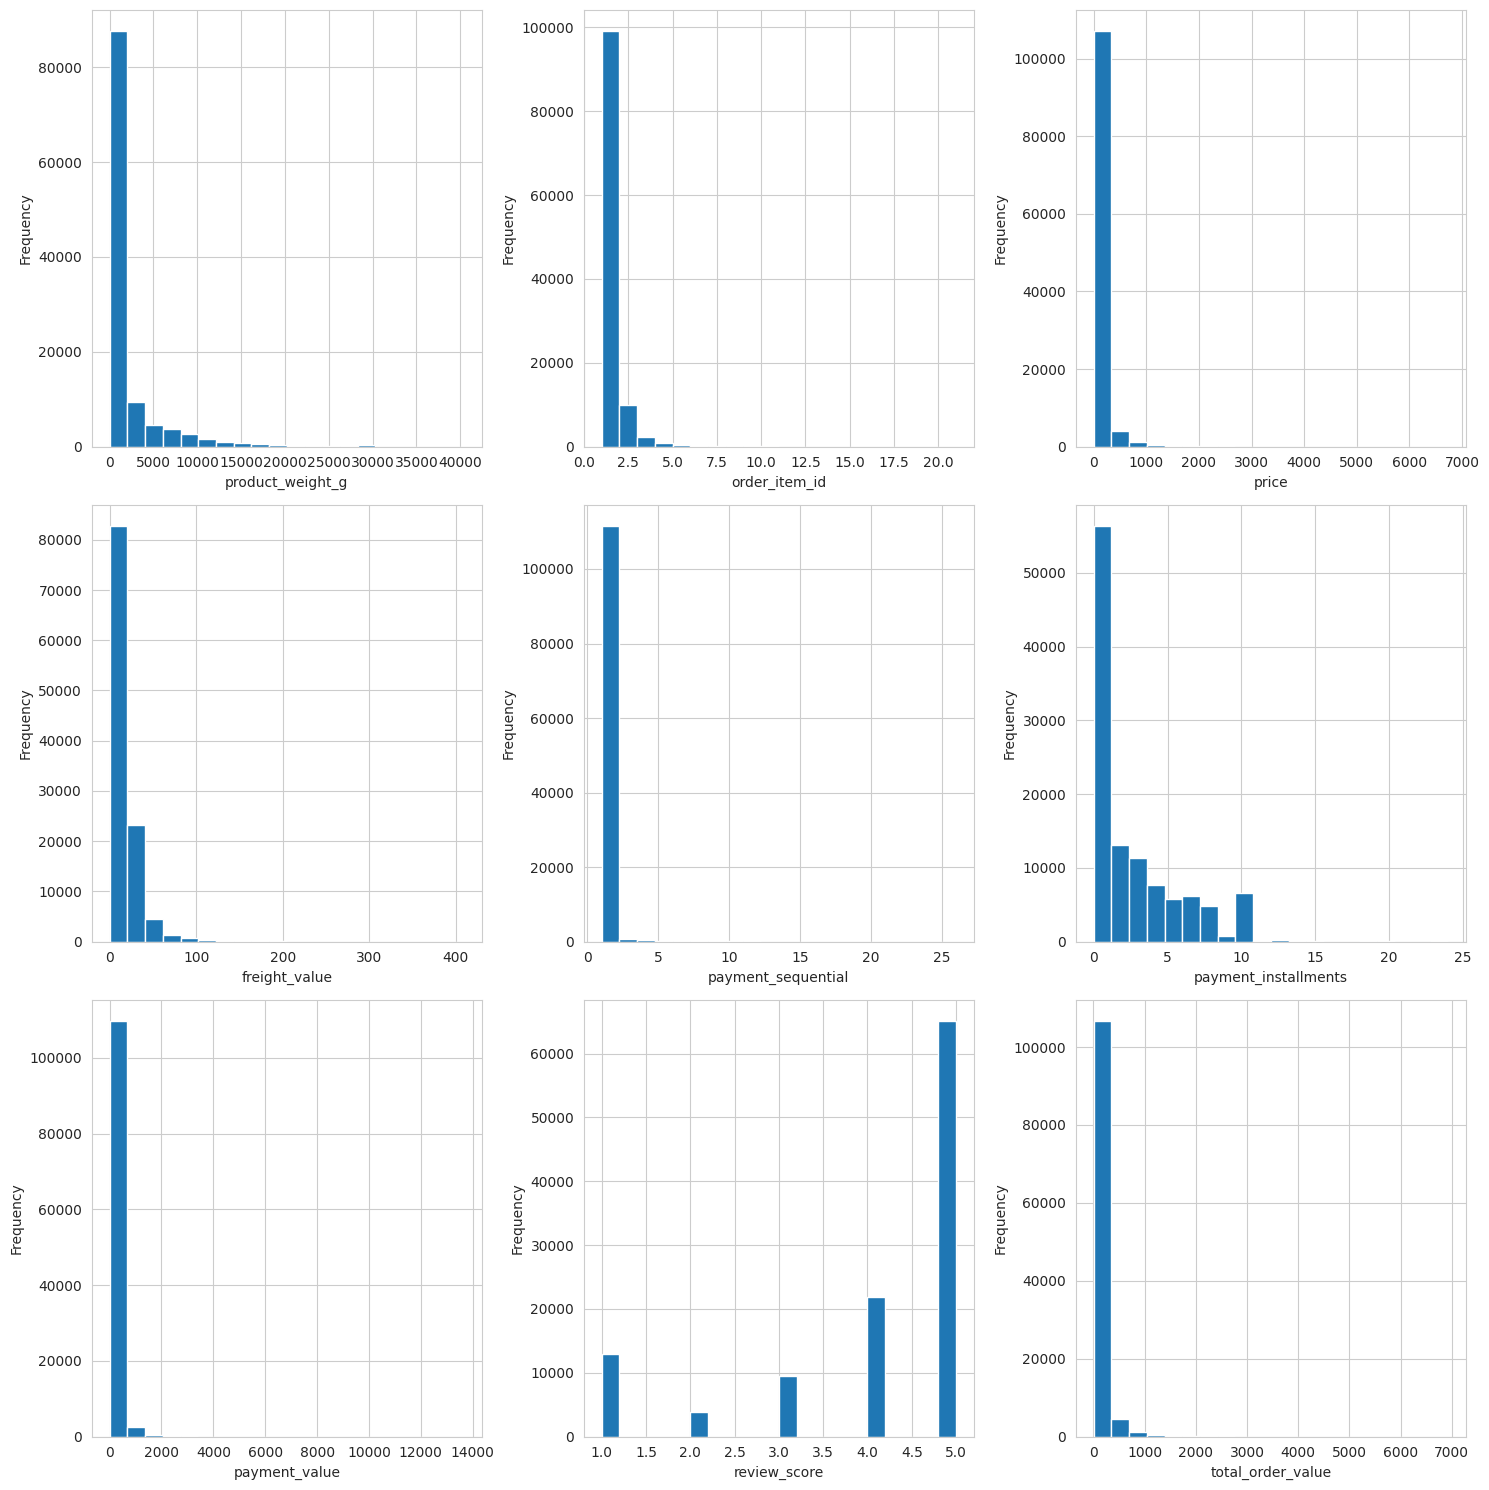

In [72]:
# Get numerical columns, excluding specified ones
numerical_cols = data_clean.select_dtypes(include=np.number).columns
numerical_cols = [col for col in numerical_cols if col not in ['day', 'month', 'year', 'hour']]

# Calculate the number of rows and columns for the grid
num_cols = 3  # Number of columns in the grid
num_rows = math.ceil(len(numerical_cols) / num_cols)  # Calculate rows needed

# Create the figure and axes for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the numerical columns and create histograms
for i, col in enumerate(numerical_cols):
    axes[i].hist(data_clean[col], bins=20)  # Adjust the number of bins as needed
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

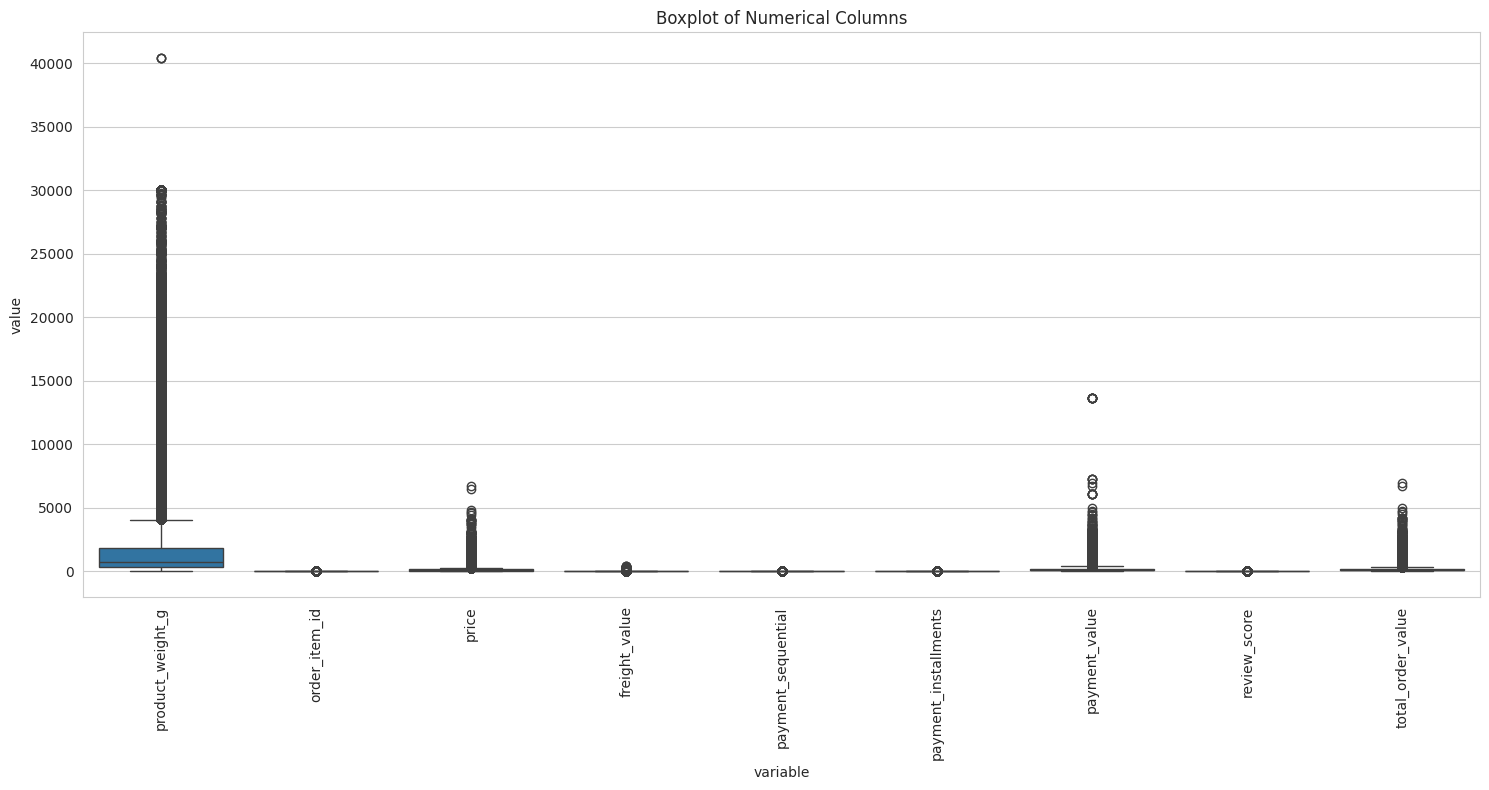

In [73]:
# Melt the DataFrame to long format
data_melted = pd.melt(data_clean, value_vars=numerical_cols)

# Create the boxplot
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
sns.boxplot(x='variable', y='value', data=data_melted)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Numerical Columns')
plt.tight_layout()
plt.show()

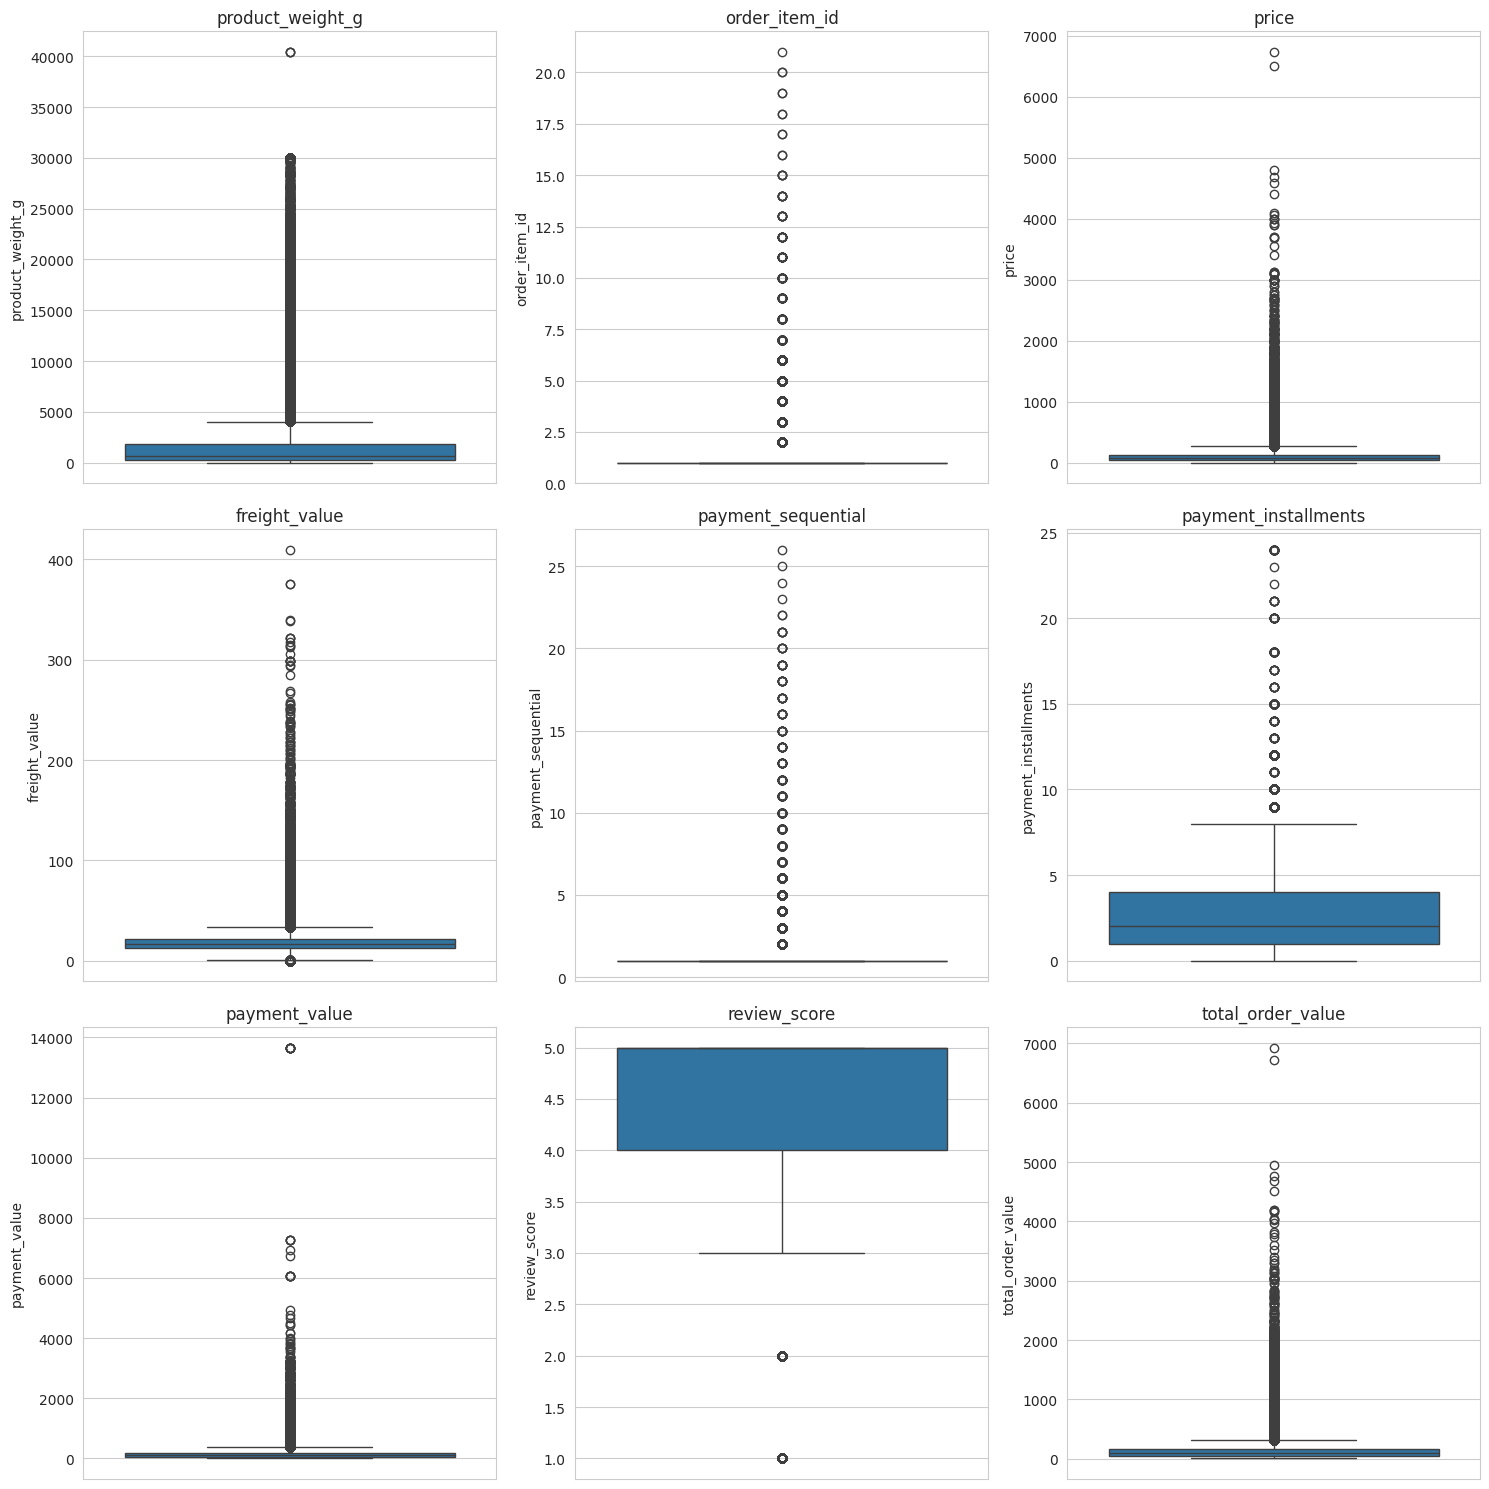

In [74]:
import math

# Get numerical columns, excluding specified ones
numerical_cols = data_clean.select_dtypes(include=np.number).columns
numerical_cols = [col for col in numerical_cols if col not in ['day', 'month', 'year', 'hour']]

# Calculate the number of rows and columns for the grid
num_cols_grid = 3  # Number of columns in the grid
num_rows = math.ceil(len(numerical_cols) / num_cols_grid)  # Calculate rows needed

# Create the figure and axes for the grid
fig, axes = plt.subplots(num_rows, num_cols_grid, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the numerical columns and create box plots
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=data_clean[col], ax=axes[i])  # Create box plot on the current subplot
    axes[i].set_title(col)  # Set title for the subplot
    axes[i].set_ylabel(col)  # Set y-axis label

# Hide any unused subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [75]:
#data_clean[['total_order_value', 'payment_value']]
data_clean['payment_value'].info()

<class 'pandas.core.series.Series'>
Index: 113193 entries, 0 to 119142
Series name: payment_value
Non-Null Count   Dtype  
--------------   -----  
113193 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


## Exploratory Data Analysis

Exploratory data analysis (EDA) dilakukan untuk mengetahui, memahami, dan mempelajari data yang sudah disiapkan untuk memperoleh informasi atau insight yang penting

Dalam kasus ini, EDA yang dilakukan juga untuk marketing analysis yang sebagian yang bersifat general.

#### Customer Demographic

##### Count Unique Customer Id by State

*   Memberikan gambaran distribusi customer
berdasarkan state (negara bagian) di Brazil.
*   Mengidentifikasi state dengan jumlah customer terbanyak, yang kemungkinan merupakan pasar potensial utama.





In [76]:
# Mengubah nama kolom 'customer_state' menjadi 'address_static' dan 'customer_city' menjadi 'address_city'
data_clean = data_clean.rename(columns={'customer_state': 'address_static', 'customer_city': 'address_city'})

In [77]:
# Melakukan pengelompokan berdasarkan 'address_static' dan menghitung jumlah unique 'customer_unique_id'
customer_by_state = data_clean.groupby('address_static')['customer_unique_id'].nunique().reset_index()

# Mengurutkan data berdasarkan jumlah customer
customer_by_state = customer_by_state.sort_values(by=['customer_unique_id'], ascending=False)
customer_by_state.head()

,address_static,customer_unique_id
25,SP,38416
18,RJ,11621
10,MG,10778
22,RS,5072
17,PR,4682


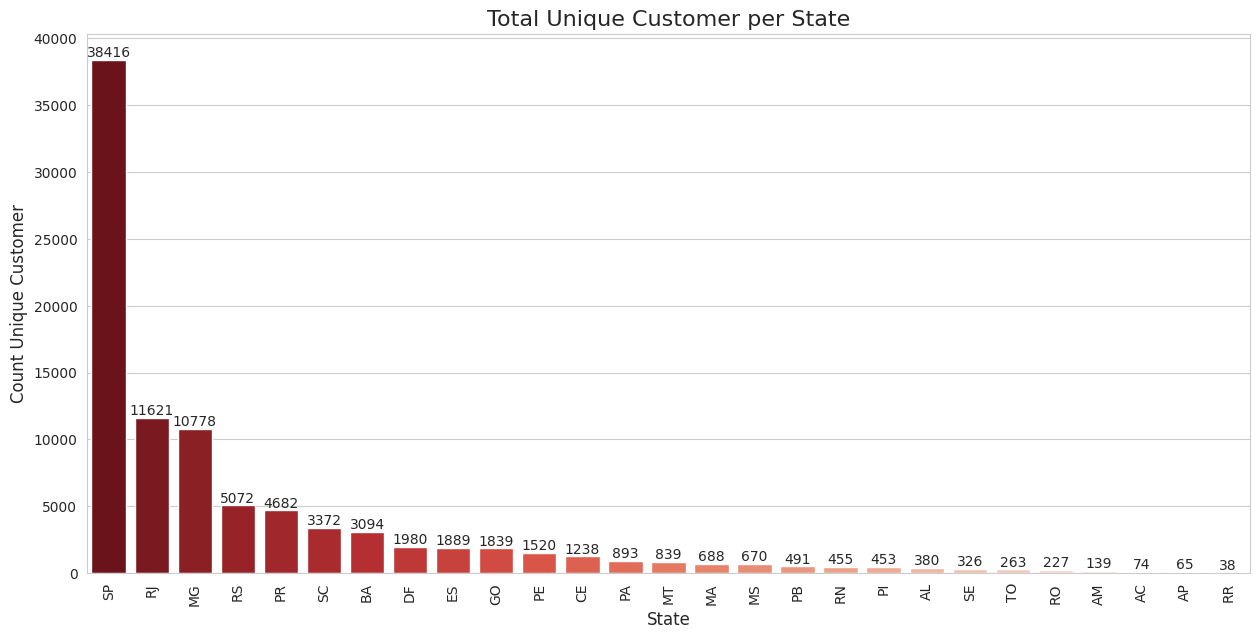

In [78]:
# Membuat palette warna divergent
#palette = sns.diverging_palette(220, 20, n=len(customer_by_state))

plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")

# Menggunakan palette warna yang telah dibuat
ax = sns.barplot(x='address_static', y='customer_unique_id', data=customer_by_state, palette="Reds_r")

# Menambahkan label di atas setiap bar
#ax.bar_label(ax.containers[3])
for container in ax.containers[0:]:  # Iterasi pada samua container/bar
    ax.bar_label(container)

plt.title('Total Unique Customer per State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count Unique Customer', fontsize=12)
plt.xticks(rotation=90)

plt.show()

Negara bagian SP (Sao Paulo) memiliki jumlah pelanggan terbanyak, sehingga strategi pemasaran mungkin perlu difokuskan di wilayah tersebut.

##### Count Unique Customer Id by City

*   Mempersempit fokus ke tingkat kota, menunjukkan kota-kota dengan konsentrasi pelanggan tertinggi.
*   Membantu dalam mengidentifikasi area dengan potensi pertumbuhan pasar.



In [79]:
# Melakukan pengelompokan berdasarkan 'address_city' dan menghitung jumlah unique 'customer_unique_id'
customer_by_city = data_clean.groupby('address_city')['customer_unique_id'].nunique().reset_index()

# Mengurutkan data berdasarkan jumlah customer
customer_by_city = customer_by_city.sort_values(by=['customer_unique_id'], ascending=False)
customer_by_city.head()

,address_city,customer_unique_id
3552,sao paulo,14216
3117,rio de janeiro,6200
448,belo horizonte,2546
552,brasilia,1975
1133,curitiba,1412


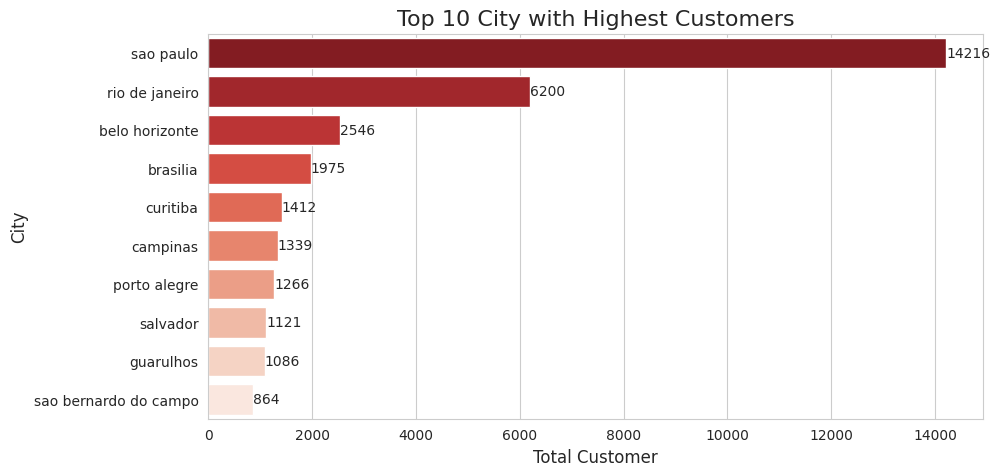

In [80]:
# Mengambil 10 kota teratas
top_cities = customer_by_city.head(10)

plt.figure(figsize=(10, 5))
#sns.set_style("whitegrid")

# Membuat horizontal bar chart
ax = sns.barplot(y='address_city', x='customer_unique_id', data=top_cities, palette="Reds_r")

#ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
for container in ax.containers[0:]:  # Iterasi pada samua container/bar
    ax.bar_label(container)

plt.title('Top 10 City with Highest Customers', fontsize=16)
plt.ylabel('City', fontsize=12)
plt.xlabel('Total Customer', fontsize=12)
plt.show()

Sao Paulo dan Rio de Janeiro adalah kota dengan jumlah pelanggan terbanyak, mengindikasikan pentingnya kedua kota tersebut dalam strategi bisnis.

##### Customer Segmentation by Frequency Order

*   Membuat segmentasi customer berdasarkan seberapa banyak transaksi yang dilakukan oleh masing-masing csutomer.
*   Dibagi menjadi 2 segment, yaitu 'little' jika total order <= 5 dan 'lot' jika total order > 5.



In [81]:
# Hitung total pesanan untuk setiap pelanggan
total_orders = data_clean.groupby('customer_unique_id')['order_id'].count().reset_index()
#total_orders.rename(columns={'order_id': 'total_orders'}, inplace=True)

# Buat kolom frekuensi pesanan
total_orders['frequency'] = total_orders['order_id'].apply(lambda x: 'little' if x <= 5 else 'lot')

# Tampilkan tabel
total_orders[total_orders['frequency']=='lot']

,customer_unique_id,order_id,frequency
225,0097fca0db567f5ca79509b7b4fc1c2d,7,lot
364,00face5c8f7dbb7eefd4112722f26903,6,lot
607,019ed386aec9ff0f9eab4a590231174e,6,lot
736,0209a0a5c96cc50dd1bbe71e3730af2a,6,lot
739,0209f290b5451d357308bc0e90521026,6,lot
...,...,...,...
90813,fe2b2f70f3dc31c23319ae1029eac77f,11,lot
90953,fe86d9409d83a3c561ce16e64d2d55e6,6,lot
91216,ff4bb0e2cade5df30146a1d570ae777d,11,lot
91293,ff7f36f6ba0f1126bb95b635322cf9d2,6,lot


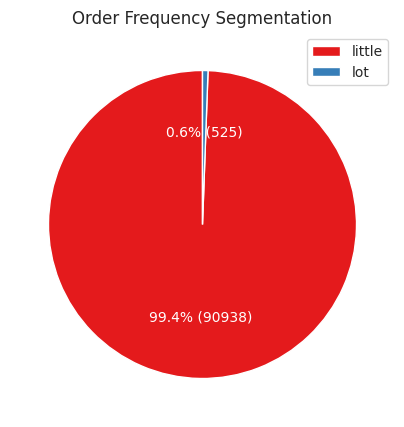

In [82]:
# Menghitung jumlah pelanggan di setiap segmen
frequency_counts = total_orders['frequency'].value_counts()

# Membuat diagram lingkaran
plt.figure(figsize=(5, 5))

# Membuat pie chart dengan label value dan persentase
plt.pie(frequency_counts, labels=frequency_counts.index,
        autopct=lambda pct: f'{pct:.1f}% ({int(pct/100.*frequency_counts.sum())})',
        startangle=90, colors=sns.color_palette("Set1"), textprops={'color': "w"})
plt.legend(frequency_counts.index, loc="best")
plt.title('Order Frequency Segmentation')
plt.show()

                 mean         std  median   min      max
frequency                                               
little     140.805850  189.178266   92.63  6.08  6929.31
lot        115.530191  156.676625   75.62  9.09  2511.75


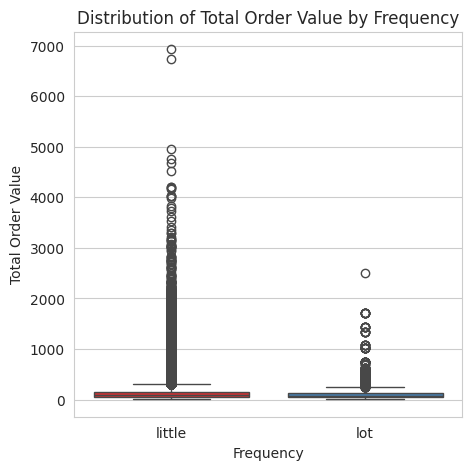

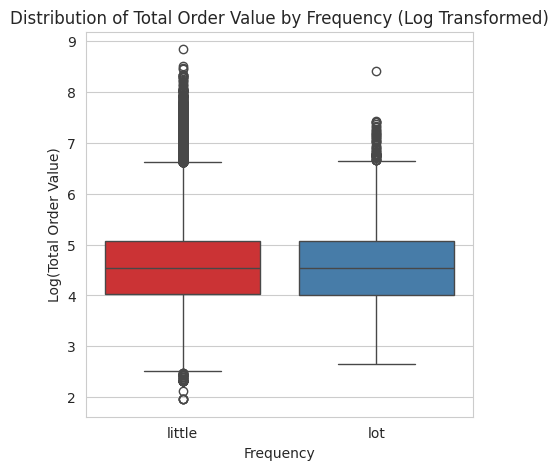

In [83]:
# Gabungkan total_orders dengan data_clean
total_orders_merged = pd.merge(total_orders, data_clean[['customer_unique_id', 'total_order_value']], on='customer_unique_id', how='left')

# Grouping dan Hitung Statistik
grouped_data = total_orders_merged.groupby('frequency')['total_order_value'].agg(['mean', 'std', 'median', 'min', 'max'])
print(grouped_data)

# Membuat box plot
plt.figure(figsize=(5, 5))
sns.boxplot(x='frequency', y='total_order_value', data=total_orders_merged, palette='Set1')
plt.title('Distribution of Total Order Value by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Total Order Value')
plt.show()

# Transformasi Logaritma
total_orders_merged['total_order_value_log'] = np.log1p(data_clean['total_order_value'])

# Visualisasi Box Plot
plt.figure(figsize=(5, 5))
sns.boxplot(x='frequency', y='total_order_value_log', data=total_orders_merged, palette='Set1')
plt.title('Distribution of Total Order Value by Frequency (Log Transformed)')
plt.xlabel('Frequency')
plt.ylabel('Log(Total Order Value)')
plt.show()

In [84]:
Q1 = total_orders_merged['total_order_value'].quantile(0.25)
Q3 = total_orders_merged['total_order_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = total_orders_merged[(total_orders_merged['total_order_value'] < lower_bound) | (total_orders_merged['total_order_value'] > upper_bound)]
total_orders_merged['is_outlier'] = 0
total_orders_merged.loc[outliers.index, 'is_outlier'] = 1

#total_orders_merged[total_orders_merged['is_outlier'] == 1]
total_orders_merged[total_orders_merged['is_outlier'] == 0]
#total_orders_merged.info()

,customer_unique_id,order_id,frequency,total_order_value,total_order_value_log,is_outlier
0,0000366f3b9a7992bf8c76cfdf3221e2,1,little,141.90,4.293059,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,little,27.19,5.563869,0
2,0000f46a3911fa3c0805444483337064,1,little,86.22,5.383899,0
3,0000f6ccb0745a6a4b88665a16c9f078,1,little,43.62,3.287655,0
4,0004aac84e0df4da2b147fca70cf8255,1,little,196.89,5.389254,0
...,...,...,...,...,...,...
113186,fffb09418989a0dbff854a28163e47c6,1,little,73.16,4.461300,0
113189,fffea47cd6d3cc0a88bd621562a9d061,1,little,84.58,5.127766,0
113190,ffff371b4d645b6ecea244b27531430a,1,little,112.46,5.127766,0
113191,ffff5962728ec6157033ef9805bacc48,1,little,133.69,5.127766,0


In [85]:
num_outliers = total_orders_merged['is_outlier'].sum()
num_non_outliers = len(total_orders_merged) - num_outliers

proportion_outliers = num_outliers / len(total_orders_merged) *100
proportion_non_outliers = num_non_outliers / len(total_orders_merged) * 100

print(f"Proportion of Outliers: {proportion_outliers}")
print(f"Proportion of Non-Outliers: {proportion_non_outliers}")

Proportion of Outliers: 7.326424778917424
Proportion of Non-Outliers: 92.67357522108257


##### Analysis Customer Behaviour by Time Difference Day Order

Mengelompokkan customer berdasarkan frekuensi dan rentang waktu transaksi.



In [86]:
# Buat tabel pembelian pertama dan terakhir
first_last_purchase = data_clean.groupby('customer_unique_id')['order_purchase_timestamp'].agg(['min', 'max']).reset_index()
first_last_purchase.columns = ['customer_unique_id', 'first_purchase', 'last_purchase']

# Gabungkan tabel
diff_purchase = pd.merge(first_last_purchase, total_orders, on='customer_unique_id', how='left')

# Hitung selisih total pesanan
diff_purchase['difference_day_order'] = (diff_purchase['last_purchase'] - diff_purchase['first_purchase']).dt.days

In [87]:
# Tampilkan tabel
diff_purchase[(diff_purchase['frequency'] == 'lot') & (diff_purchase['difference_day_order'] > 1)].sample(5)

,customer_unique_id,first_purchase,last_purchase,order_id,frequency,difference_day_order
59334,a5d3bfee5b23b430b95c4ae295e1028a,2017-01-21 06:58:31,2017-01-23 13:31:26,11,lot,2
2532,070acf4df1234a6257809e4e79644481,2017-10-26 14:42:55,2018-07-18 07:41:58,7,lot,264
17583,310647380793836bfa5b7b6b3f518423,2017-04-18 09:46:40,2017-10-18 13:34:48,10,lot,183
2890,07ff81a9676efa0286ddd3f09e7c0063,2018-02-16 15:56:36,2018-06-11 17:56:07,12,lot,115
49206,89be58cbdd6ef318e3ed93fdb22be178,2018-01-28 23:36:01,2018-03-26 03:50:48,10,lot,56


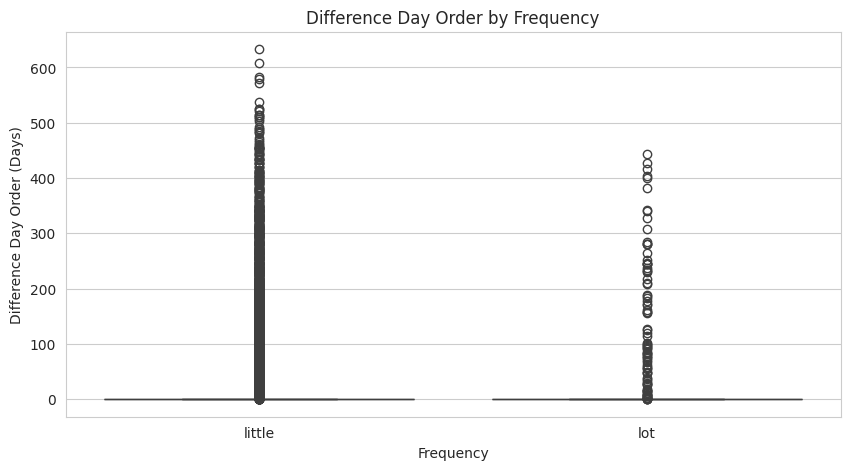

In [88]:
# Visualisasi hubungan antara difference_day_order dan frequency
plt.figure(figsize=(10, 5))
sns.boxplot(x='frequency', y='difference_day_order', data=diff_purchase)
plt.title('Difference Day Order by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Difference Day Order (Days)')
plt.show()

Semakin sering dan semakin baru pelanggan bertransaksi, semakin tinggi tingkat loyalitas mereka. Informasi ini membantu dalam mengidentifikasi pelanggan yang perlu dipertahankan dan yang perlu didorong untuk kembali bertransaksi. Seperti program loyalitas untuk customer 'lot', kampanye re-engagement untuk customer sporadis, dan penawaran menarik untuk customer baru.



##### **Conclusions**

Pada EDA Customer Demographic ini, dapat diperoleh insight yg lebih menyeluruh tentang basis customer OLIST, yaitu sebagai berikut:

1. **Lokasi Pelanggan:** Olist memiliki konsentrasi customer tertinggi di state SP (Sao Paulo), khususnya di kota Sao Paulo dan Rio de Janeiro. Ini menunjukkan bahwa area ini merupakan pasar utama dan perlu menjadi fokus strategi bisnis.

2. **Segmentasi Pelanggan:** Dengan diff_purchase, kita dapat mengelompokkan pelanggan berdasarkan frekuensi dan rentang waktu transaksi. Informasi ini dapat digunakan untuk mengembangkan strategi pemasaran yang ditargetkan untuk setiap segmen, seperti program loyalitas untuk pelanggan 'lot', kampanye re-engagement untuk pelanggan sporadis, dan penawaran menarik untuk pelanggan baru.

3. **Personalisasi:** Dengan menggabungkan data lokasi dan perilaku pembelian, Olist dapat melakukan personalisasi penawaran dan layanan kepada pelanggan, misalnya dengan merekomendasikan produk yang relevan berdasarkan lokasi dan riwayat pembelian.

### Order Behavior

##### Average Frequency Order per Customers

*   Memberikan infromasi tentang frekuensi
jumlah item (count) yang dibeli setiap customer.
*   Mengelompokkan data berdasarkan customer_unique_id dan menghitung jumlah order_id yang dilakukan oleh setiap pelanggan.



In [89]:
# Hitung jumlah item yang dipesan per customer_unique_id
items_per_customer = data_clean.groupby('customer_unique_id')['order_item_id'].count().reset_index()

# Hitung rata-rata jumlah item yang dipesan
avg_items_per_customer = items_per_customer['order_item_id'].mean()

# Buat tabel pengelompokan
customer_frequency = data_clean.groupby('customer_unique_id')['order_id'].nunique().reset_index()
customer_frequency.rename(columns={'order_id': 'total_orders'}, inplace=True)

# Buat kolom frekuensi pesanan
customer_frequency['frequency'] = customer_frequency['total_orders'].apply(lambda x: 'little' if x <= 5 else 'lot')

# Gabungkan customer_frequency dengan avg_items_per_customer menggunakan merge
customer_frequency = pd.merge(customer_frequency, items_per_customer, on='customer_unique_id', how='left')
customer_frequency.rename(columns={'order_item_id': 'avg_items_ordered'}, inplace=True)  # Rename kolom

# 6. Tampilkan tabel
display(customer_frequency.sample(10))

print(f"\nRata-rata jumlah item yang diorder per customer: {avg_items_per_customer}")

,customer_unique_id,total_orders,frequency,avg_items_ordered
18446,337171f37d6abe2a1ff41485e1576733,1,little,1
81490,e3aea0c015dcb93e4b34593a0ea4324b,1,little,1
40868,720d84aae6eca7bf195d5fdadf69f88c,1,little,1
51161,8f6628a87734b0a0492ae8259fc96fc2,1,little,1
29435,52343fcfb4c1fbb0f91f9752d850d5fc,1,little,2
48501,87a7c3090f96d9da963125a0d7f8193a,2,little,2
42431,76a5a50d60701cb6feca23fe2f1fac40,1,little,2
5997,109910199a707cb5e88edf22720c8d97,1,little,1
5058,0e118f769d320e71128975be6fb1fcc0,1,little,1
91430,ffe7752edcf14b5819058b1948e02f3a,1,little,1



Rata-rata jumlah item yang diorder per customer: 1.2375553490406166


##### Avarege & Std Deviation per Item Category



*   Mengelompokkan data berdasarkan product_category_name_english dan menghitung statistik deskriptif (mean & std) untuk kolom product_weight_g.
*   Hasil dari data item_weight, dapat diperkirakan biaya pengiriman dan penanganan produk berdasarkan berat rata-rata kategori.



In [90]:
item_weight = data_clean.groupby('product_category_name_english')['product_weight_g'].agg(['mean', 'std'])
item_weight.sort_values(by='mean', ascending=False)

,mean,std
product_category_name_english,,
office_furniture,11241.560069,4795.625249
furniture_bedroom,10319.957983,5177.439018
home_appliances_2,9875.324427,7135.254917
kitchen_dining_laundry_garden_furniture,8777.252595,8158.100428
furniture_mattress_and_upholstery,8388.750000,10823.369111
...,...,...
fashion_sport,340.000000,349.235619
tablets_printing_image,292.411765,64.339186
fashion_childrens_clothes,285.714286,203.540098


##### Frequnecy Order by Time Category

In [91]:
# Definisikan fungsi untuk mengkategorikan waktu
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'evening'
    else:
        return 'night'

# Terapkan fungsi untuk membuat kolom 'time_category'
data_clean['time_category'] = data_clean['hour'].apply(categorize_time)

# Lakukan pengelompokan dan hitung frekuensi
order_frequency = data_clean.groupby(['month', 'day', 'time_category'])['order_id'].count().reset_index()

# Urutkan berdasarkan frekuensi (opsional)
order_frequency = order_frequency.sort_values(by=['month', 'day', 'order_id'], ascending=[True, True, False])

In [92]:
#order_frequency[order_frequency['month']==12].head()

order_frequency = order_frequency.sort_values(by='order_id', ascending=False)
order_frequency.head()

,month,day,time_category,order_id
983,11,24,night,613
981,11,24,evening,464
982,11,24,morning,302
639,8,2,evening,283
594,7,18,evening,261


In [ ]:
# Agregasi data order_frequency berdasarkan bulan, kategori waktu, dan jumlah pesanan
monthly_time_category_orders = order_frequency.groupby(['month', 'time_category'])['order_id'].sum().reset_index()

# Membuat grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='order_id', hue='time_category', data=monthly_time_category_orders, palette='Set1')
plt.title('Order Frequency by Month and Time Category')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.legend(title='Time Category')
plt.show()

##### Classification Average Order Value per Customer

Memberikan informasi tentang rata-rata nilai order untuk setiap customer dan mengklasifikasikannya ke dalam kategori harga yaitu expensive, normal, dan cheap.



In [94]:
# Hitung total nilai order untuk setiap order
data_clean['total_order_value'] = data_clean['price'] + data_clean['freight_value']

# Hitung rata-rata nilai total order per order
avg_order_value = data_clean.groupby('order_id')['total_order_value'].mean().reset_index()
avg_order_value.rename(columns={'total_order_value': 'avg_total_order_value'}, inplace=True)

# Klasifikasi
def classify_order_price(price):
  if price > 2500:
    return 'expensive'
  elif price >=1000 and price <=2500:
    return 'normal'
  else:
    return 'cheap'

# Terapkan fungsi untuk membuat kolom 'price_category'
avg_order_value['price_classify'] = avg_order_value['avg_total_order_value'].apply(classify_order_price)

# Gabungkan avg_order_value dengan data_clean menggunakan merge
total_order_with_classify = pd.merge(data_clean[['customer_unique_id', 'order_id']], avg_order_value, on='order_id', how='left')

In [95]:
total_order_with_classify.sample(10)

,customer_unique_id,order_id,avg_total_order_value,price_classify
16921,2f2ab1b5055acca714e38c613a4f2763,268270567c35e07af0d2f8c8cc978410,46.18,cheap
24743,723f7b82c924b4d6cf97925277f199c3,37f61d782089bd338aff5207a31fb933,470.46,cheap
29782,85f759383b36fc0ce9844aecac8b8117,43443d5fff4b94d98df1ad41af13d302,97.58,cheap
105295,978c8ffba59f7650d77198236ada2e26,ee1de1bcd287c6d9584b5e78d1b534be,196.99,cheap
8732,c51b05929079be99aeab2ca8e64ff73a,13f12afcd38859a0ce8e667475326c44,155.86,cheap
8643,5e41dd374b16457815721cce195d252f,13bc2aa1a887b018329663498f5e00ab,353.27,cheap
78524,f5077e018f5ad2cf539a5a6f698654f1,b198ccd6b70f2462922861e8c5a571cf,501.92,cheap
76872,906444ea56230f90c5886426dd54669a,adf119c06ea77cd7d347b943780c37de,139.41,cheap
23081,b9665ce6b69c18fd936289caba833265,345de0cb4a0a058abaa652096fd1f89e,137.99,cheap
69828,c4d723b23a4efe6a8abbdc547840c4a1,9e528d40350e823ff188831cb38696c3,54.00,cheap


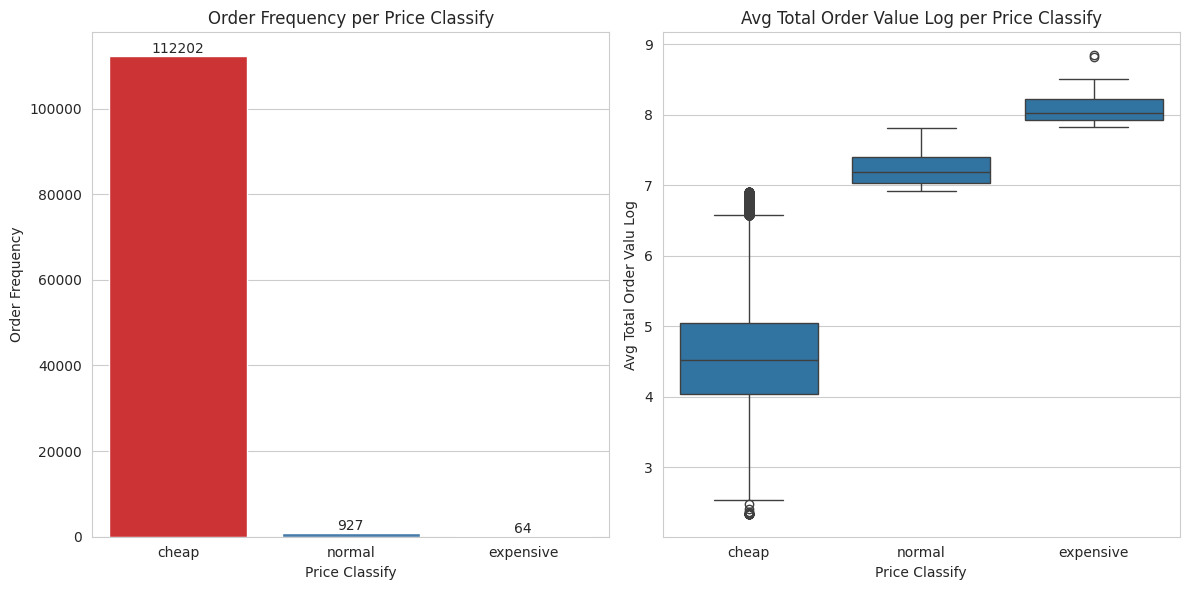

                       mean         std   median          min      max
price_classify                                                        
cheap            127.527052  121.016708    91.08     9.341429   997.37
expensive       3345.553281  881.935340  3043.24  2512.530000  6929.31
normal          1409.978425  356.881082  1319.32  1002.710000  2467.33


In [96]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Sesuaikan figsize

order_counts = total_order_with_classify['price_classify'].value_counts()

# Boxplot pertama (avg_total_order_value)
ax = sns.barplot(x=order_counts.index, y=order_counts.values, palette='Set1', order=['cheap', 'normal', 'expensive'], ax=axes[0])
for container in ax.containers[0:]:
    ax.bar_label(container)
axes[0].set_title('Order Frequency per Price Classify')
axes[0].set_xlabel('Price Classify')
axes[0].set_ylabel('Order Frequency')

total_order_with_classify['avg_total_order_value_log'] = np.log1p(total_order_with_classify['avg_total_order_value'])

# Boxplot kedua (avg_total_order_value_log)
sns.boxplot(x='price_classify', y='avg_total_order_value_log', data=total_order_with_classify, order=['cheap', 'normal', 'expensive'], ax=axes[1])
axes[1].set_title('Avg Total Order Value Log per Price Classify')
axes[1].set_xlabel('Price Classify')
axes[1].set_ylabel('Avg Total Order Valu Log')
plt.tight_layout()
plt.show()

# Grouping dan Hitung Statistik
grouped_data_order_price = total_order_with_classify.groupby('price_classify')['avg_total_order_value'].agg(['mean', 'std', 'median', 'min', 'max'])
print(grouped_data_order_price)

##### Populer Payment Methods & Preference Product Category per Customer

1. Melihat data metode pembayaran yang paling sering digunakan oleh customer, yaitu credit card sebanyak 70062 kali dan menampilkan 10 data secara acak dari popular_payment.

In [97]:
# Kelompokkan data berdasarkan customer_unique_id dan payment_type
payment_preference = data_clean.groupby(['customer_unique_id', 'payment_type'])['order_id'].count().reset_index()

# Ubah nama kolom order_id menjadi frequency
payment_preference.rename(columns={'order_id': 'frequency'}, inplace=True)

# Melihat metode pembayaran terpopuler untuk setiap customer
popular_payment = payment_preference.loc[payment_preference.groupby('customer_unique_id')['frequency'].idxmax()]
display(popular_payment.sample(10))

mode_popular_payment = popular_payment['payment_type'].mode()[0]
count_popular_payment = popular_payment[popular_payment['payment_type']=='credit_card'].count()[0]

print(f"\nMetode pembayaran yang paling sering digunakan customer adalah {mode_popular_payment} sebanyak {count_popular_payment} kali")

,customer_unique_id,payment_type,frequency
4557,0c4bdb70639bcccc2f182e9d2531e5cf,credit_card,2
62952,ab6ece4e51f2edf19eda26c22de75fcc,credit_card,1
12078,20c9a53c3854bfc025c64d38bca96385,credit_card,1
84433,e60599551efd9a16671ddf0668aea5f1,credit_card,1
12866,22f6af8201369f9eb96592db3142b9c2,boleto,4
73706,c8c05588f323c1f224df94ea908941ec,credit_card,1
33451,5afbb1d2cc7c072e60088e682aa600a3,credit_card,2
68879,bb9b4553d42e28d6b5d59fd8b2540207,credit_card,4
46935,7fc67a676286f54e9fb2946e223797a6,credit_card,1
54200,93fd4374ecb9d8db4fb5003f4536df43,credit_card,1



Metode pembayaran yang paling sering digunakan customer adalah credit_card sebanyak 70062 kali


---
2. Grouping data populer_payment dan
populer_product untuk melihat metode pembayaran yang paling sering dipakai dan preferensi kategori produknya dari setiap customer.

In [98]:
# Kelompokkan data berdasarkan customer_unique_id dan product_category
product_preference = data_clean.groupby(['customer_unique_id', 'product_category_name_english'])['order_id'].count().reset_index()

# Ubah nama kolom order_id menjadi frequency
product_preference.rename(columns={'order_id': 'frequency'}, inplace=True)

# Melihat kategori produk terpopuler untuk setiap customer
popular_product = product_preference.loc[product_preference.groupby('customer_unique_id')['frequency'].idxmax()]
#popular_product.sample(10)

# Gabungkan kedua tabel dengan semua kolom dari most_popular_product
populer_payment_method_and_product = pd.merge(popular_payment, popular_product[['customer_unique_id', 'product_category_name_english']], on='customer_unique_id', how='left')
populer_payment_method_and_product.sort_values(by='frequency', ascending=False)

,customer_unique_id,payment_type,frequency,product_category_name_english
55230,9a736b248f67d166d2fbb006bcb877c3,voucher,75,bed_bath_table
40001,6fbc7cdadbb522125f4b27ae9dee4060,voucher,36,office_furniture
89271,f9ae226291893fda10af7965268fb7f6,voucher,32,garden_tools
31031,569aa12b73b5f7edeaa6f2a01603e381,voucher,25,bed_bath_table
78423,db1af3fd6b23ac3873ef02619d548f9c,voucher,24,computers_accessories
...,...,...,...,...
32536,5ab184ff353d5cdb3f1e58c8b0486468,credit_card,1,perfumery
32535,5ab0302ed9544817776a78a8fffb46bb,boleto,1,watches_gifts
32533,5aaf237a53b94f01b6043dd1ec7b0339,boleto,1,small_appliances
32532,5aaea40535337a39bb7b3a959b28b58e,credit_card,1,pet_shop


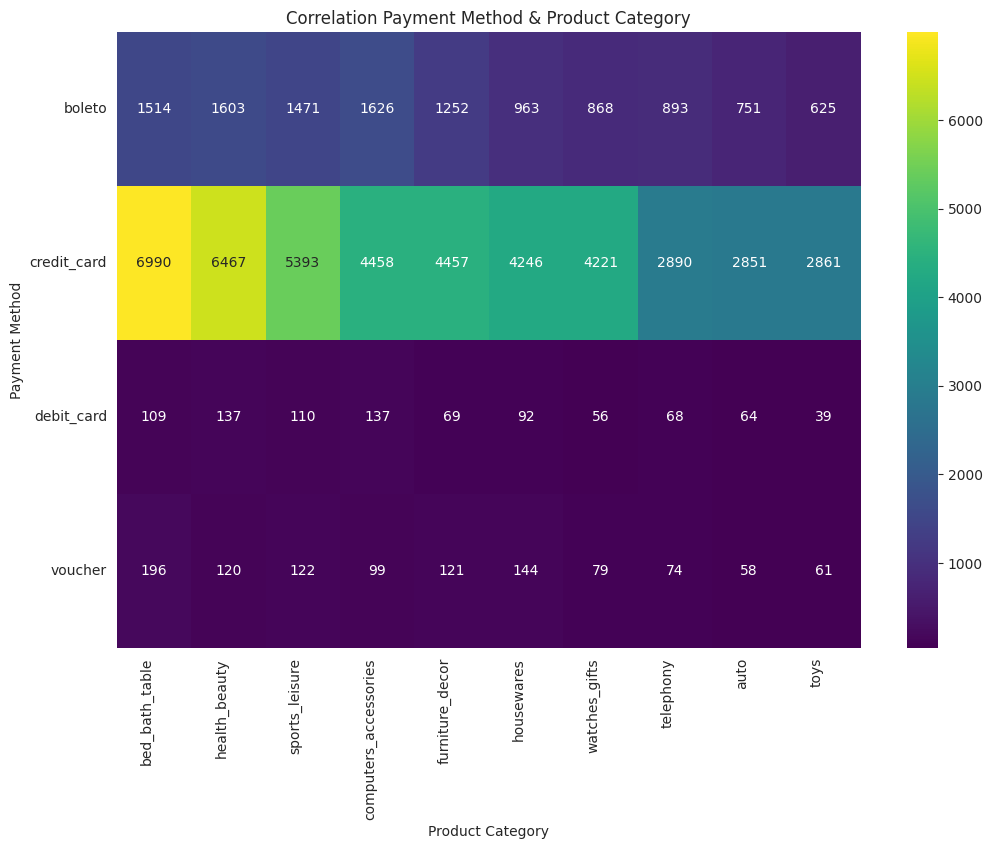

In [99]:
# Membuat crosstab untuk menghitung frekuensi kombinasi metode pembayaran dan kategori produk
payment_product_crosstab = pd.crosstab(populer_payment_method_and_product['payment_type'],
                                        populer_payment_method_and_product['product_category_name_english'])

# Mengambil 10 kategori produk terpopuler
top_10_categories = payment_product_crosstab.sum(axis=0).sort_values(ascending=False).head(10).index

# Memfilter crosstab untuk hanya menyertakan 10 kategori terpopuler
payment_product_crosstab_top10 = payment_product_crosstab[top_10_categories]

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(payment_product_crosstab_top10, annot=True, cmap='viridis', fmt='d')  # Menambahkan anotasi dan format angka
plt.title('Correlation Payment Method & Product Category')
plt.xlabel('Product Category')
plt.ylabel('Payment Method')
plt.xticks(rotation=90, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.yticks(rotation=0)  # Mengatur rotasi label sumbu y menjadi 0
plt.show()

##### Top Trending Product Cargory Each Year

1. Groping data tahun dan kategory product berdasarkan frequency order per order.

2. Melihat top 3 kategory produk yang paling sering di order setiap tahunnya.

In [100]:
# Kelompokkan data dan hitung frekuensi pesanan per tahun dan kategori
category_by_year = data_clean.groupby(['year', 'product_category_name_english'])['order_id'].count().reset_index()

# Ubah nama kolom order_id menjadi frequency
category_by_year.rename(columns={'order_id': 'frequency'}, inplace=True)

# Urutkan berdasarkan frekuensi (dari tertinggi ke terendah)
category_by_year = category_by_year.sort_values(by=['year', 'frequency'], ascending=[True, False])

# Dapatkan top 5 kategori untuk setiap tahun
top5_category_by_year = category_by_year.groupby('year').head(5)

# Tampilkan data
top5_category_by_year

,year,product_category_name_english,frequency
16,2016,furniture_decor,76
18,2016,health_beauty,43
23,2016,perfumery,34
27,2016,toys,23
25,2016,sports_leisure,18
36,2017,bed_bath_table,5610
68,2017,furniture_decor,4268
94,2017,sports_leisure,4159
72,2017,health_beauty,3732
44,2017,computers_accessories,3135


Berdasarkan data top3_category_by_year, dapat dilihat tren dan perubahan dalam popularitas kategori produk dari tahun 2016 hingga 2018:

1. **Tahun 2016**: Pada tahun ini data yang tersedia terbatas dan hanya menunjukkan furniture_decor sebagai kategori terpopuler dengan 76 order. Ini mungkin menunjukkan bahwa Olist baru memulai atau fokus pada kategori ini pada awal operasinya.

2. **Tahun 2017**: Terjadi perubahan signifikan pada tahun 2017. bed_bath_table muncul sebagai kategori paling populer dengan 5610 order, menggeser furniture_decor ke posisi kedua dengan 4268 pesanan. Kategori health_beauty juga masuk dalam 3 besar dengan 3389 pesanan. Ini menunjukkan bertambahnya variasi dan pertumbuhan penjualan di berbagai kategori produk.

3. **Tahun 2018**: bed_bath_table tetap menjadi kategori paling populer di tahun 2018 dengan 6066 order, menunjukkan pertumbuhan yang konsisten. health_beauty naik ke posisi kedua dengan 4822 pesanan, menggeser furniture_decor ke posisi kelima dengan 4210 order. Ini menunjukkan bahwa kategori health_beauty mengalami peningkatan popularitas yang signifikan sedangkan furniture_decor sebaliknya.

### Review Customer

##### Customer Satisfaction by Review Score

In [101]:
# Kelompokkan data berdasarkan 'customer_unique_id' dan hitung rata-rata 'review_score'
avg_review_score = data_clean.groupby('customer_unique_id')['review_score'].mean().reset_index()

# Ubah nama kolom 'review_score' menjadi 'avg_review_score'
avg_review_score.rename(columns={'review_score': 'avg_review_score'}, inplace=True)

# Tampilkan hasilnya
avg_review_score.sample(5)

,customer_unique_id,avg_review_score
51439,90219f44fa075abf64296935281ac317,5.0
88637,f7eaae0982d5d8ff27c56373895d97de,1.0
379,0104a702e0f73442fe4dc3bfff6ba373,5.0
77368,d846745ab9139733b75864c6bcc859f3,3.0
74453,d028f19f3afb163c53c0d6f3592216a4,1.0


In [102]:
# Definisikan fungsi untuk mengklasifikasikan tingkat kepuasan
def classify_satisfaction(score):
  if score >= 4:
    return 'Satisfied'
  else:
    return 'Not Satisfied'

# Terapkan fungsi untuk membuat kolom 'satisfaction_level'
avg_review_score['satisfaction_level'] = avg_review_score['avg_review_score'].apply(classify_satisfaction)

# Tampilkan hasilnya
avg_review_score.sample(5)

,customer_unique_id,avg_review_score,satisfaction_level
66940,bb10966dcf4d13066528b620ca430902,5.0,Satisfied
12753,2378eeed2dcf1e43fc9ffcbb93e04827,5.0,Satisfied
44030,7b036c2b8d58e9b305c3932c40497bea,4.0,Satisfied
53671,9642985d03ebb10ead7cd4b9e20a5519,5.0,Satisfied
24755,4527daf8c106f729aec412f367bbcaa2,5.0,Satisfied


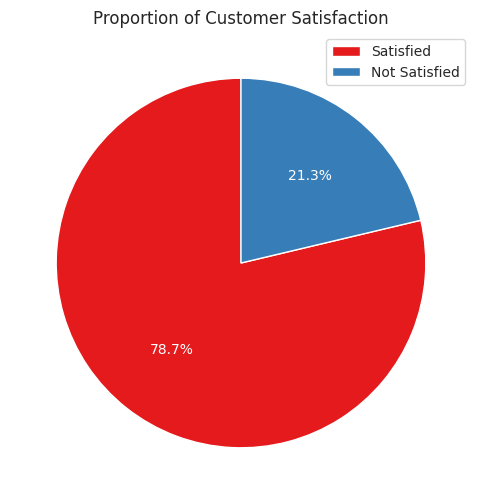

In [103]:
# Hitung jumlah pelanggan di setiap tingkat kepuasan
satisfaction_counts = avg_review_score['satisfaction_level'].value_counts()

# Membuat diagram lingkaran
plt.figure(figsize=(6, 6))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, textprops={'color': "w"}, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set1"))
plt.title('Proportion of Customer Satisfaction')
plt.legend(satisfaction_counts.index, loc="best")
plt.show()

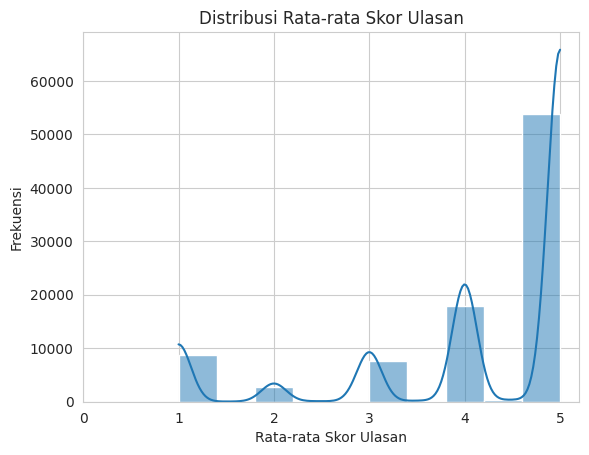

In [104]:
# Membuat histogram lebih sederhana
sns.histplot(avg_review_score['avg_review_score'], bins=10, kde=True)
plt.title('Distribusi Rata-rata Skor Ulasan')
plt.xlabel('Rata-rata Skor Ulasan')
plt.ylabel('Frekuensi')

# Mengatur ticks menjadi bilangan bulat
ax = plt.gca()  # Mendapatkan axes saat ini
xmin, xmax = ax.get_xlim()
new_xticks = np.arange(int(xmin), int(xmax) + 1, 1)
ax.set_xticks(new_xticks)

plt.show()

##### Ratio Review per Customer Transaction
Menghitung total review untuk setiap customer dan menggabungkannya dengan data total_orders untuk menemukan informasi tentang rasio review per order untuk setiap customer.

In [105]:
# Memilih pelanggan yang mengisi tiitle dan message review
review_customers_dropna = data_clean[data_clean['review_comment_title'].notna() &
                              data_clean['review_comment_message'].notna()]['customer_unique_id'].unique()

# Membuat dataFrame baru yang berisi data customer yang mengisi tiitle dan message review
review_customers = data_clean[data_clean['customer_unique_id'].isin(review_customers_dropna)]

# Menghitung total review untuk setiap customer
total_reviews = review_customers.groupby('customer_unique_id')['review_id'].count().reset_index()
total_reviews.rename(columns={'review_id': 'total_reviews'}, inplace=True)

# Grouping data total_reviews dengan total_orders
ratio_review = pd.merge(total_orders, total_reviews, on='customer_unique_id', how='left')

# Menghitung rasio ulasan per order
ratio_review['ratio_review'] = ratio_review['total_reviews'] / ratio_review['order_id']
ratio_review.sample(5)

,customer_unique_id,order_id,frequency,total_reviews,ratio_review
86747,f2a4d8c198cecc40e4da8ba8fdf05e69,1,little,1,1.0
15148,2a597df7087f2b3032a62b0b142260a3,1,little,1,1.0
50891,8eadff5e84950cd6775d1c814581d6bf,1,little,1,1.0
24962,45b98d22391bfd262db44b1c4085f76f,2,little,2,1.0
11684,208582040a31eca9d5d75cb772f0a5cc,1,little,1,1.0


### Time Series Analysis

##### Daily Sales Trend

In [106]:
# Grouping data penjualan per hari dan kategori produk
daily_sales = data_clean.groupby(['year_month', 'product_category_name_english'])['total_order_value'].sum().reset_index()
daily_sales = daily_sales.sort_values(by=['year_month'])
daily_sales['year_month'] = pd.to_datetime(daily_sales['year_month'].dt.strftime('%Y-%m'))
daily_sales

,year_month,product_category_name_english,total_order_value
0,2016-10-01,air_conditioning,1503.61
28,2016-10-01,watches_gifts,2793.71
27,2016-10-01,toys,4181.29
26,2016-10-01,telephony,334.25
24,2016-10-01,pet_shop,1191.54
...,...,...,...
1202,2018-08-01,fashio_female_clothing,169.13
1203,2018-08-01,fashion_bags_accessories,10142.37
1204,2018-08-01,fashion_male_clothing,466.98
1206,2018-08-01,fashion_sport,83.05


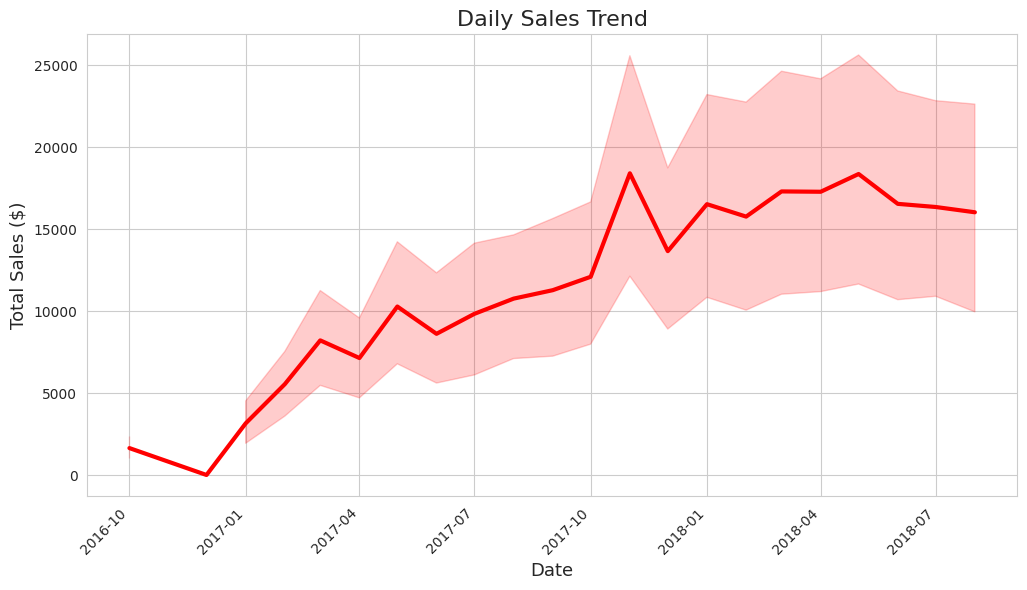

In [107]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.lineplot(x='year_month', y='total_order_value', data=daily_sales, color='red', linewidth=3)

plt.title('Daily Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Total Sales ($)', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.show()

##### DoD Performance Sales by Orders


Mengelompokkan data berdasarkan hari dalam seminggu (day_of_week) dan menghitung total order (order_id) untuk setiap hari.

In [108]:
data_clean['day_of_week'] = data_clean['order_purchase_timestamp'].dt.day_name()

orders_per_day = data_clean.groupby('day_of_week')['order_id'].count().reset_index()

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders_per_day['day_of_week'] = pd.Categorical(orders_per_day['day_of_week'], categories=days, ordered=True)
orders_per_day = orders_per_day.sort_values('day_of_week')
orders_per_day

,day_of_week,order_id
1,Monday,18369
5,Tuesday,18405
6,Wednesday,17673
4,Thursday,16906
0,Friday,16185
2,Saturday,12206
3,Sunday,13449


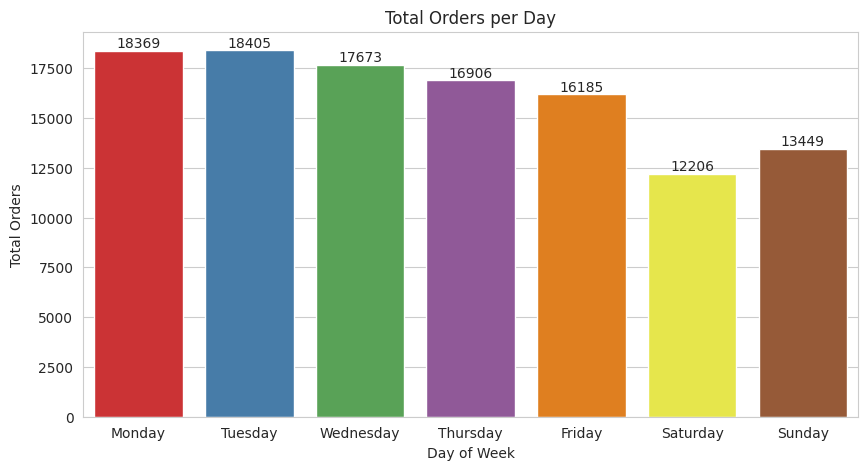

In [109]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='day_of_week', y='order_id', data=orders_per_day, palette='Set1')
for container in ax.containers[0:]:  # Iterasi pada samua container/bar
    ax.bar_label(container)

plt.title('Total Orders per Day')
plt.xlabel('Day of Week')
plt.ylabel('Total Orders')
plt.show()

Dari visualisasi diatas, dapat terlihat pola seasonality dalam total order per hari. Misalnya, jika bar plot menunjukkan bahwa total orders cenderung lebih tinggi di weekdays (senin - jumat), dan lebih rendah di weekend (sabtu dan minggu), maka kita dapat menyimpulkan bahwa ada pola mingguan dalam data pesanan.

Rekomendasi:

*   Manajemen inventaris: Dengan mengetahui hari-hari dengan pesanan tinggi, bisnis dapat memastikan stok yang cukup untuk memenuhi permintaan.
*   Penjadwalan staf: Bisnis dapat menjadwalkan lebih banyak staf pada hari-hari dengan pesanan tinggi untuk memastikan layanan pelanggan yang optimal.
* Strategi pemasaran: Bisnis dapat menjalankan kampanye pemasaran yang ditargetkan pada hari-hari dengan pesanan rendah untuk meningkatkan penjualan.

